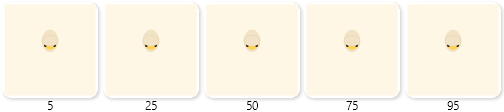

interactive(children=(FloatSlider(value=50.0, description='x'), Output()), _dom_classes=('widget-interact',))

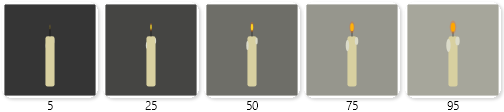

interactive(children=(FloatSlider(value=50.0, description='x'), Output()), _dom_classes=('widget-interact',))

In [ ]:
import mglyph as mg
import numpy as np

""" My glyph library """

def empty_glyph(x: float, canvas: mg.Canvas) -> None:
    pass

import mglyph as mg
import numpy as np

import mglyph as mg
import math

import mglyph as mg
import numpy as np
import math

def hatching_chick(x: float, canvas: mg.Canvas) -> None:
    pass

def burning_candle(x: float, canvas: mg.Canvas) -> None:
    # svicka
    bg_color = mg.ColorMap({0: "#343434", 100: "#A7A79C"})
    canvas.rect((-1, -1), (1, 1), style='fill', color=bg_color.get_color(x))
    canvas.rounded_rect((-0.1, -0.3), (0.1, 0.8), 0.05, 0.05, 0.05, 0.05, style='fill', color="#D8D0A0")
    # knot
    canvas.line((0, -0.5), (0, -0.3), width='10p', color='black', linecap='round')
    # plamen, bude menit velikost a barvu, bude mit dve casti - vnitrni a vnejsi, vnejsi se objevi pozdeji
    canvas.ellipse((0, -0.5), mg.lerp(x, 0.0, 0.15), mg.lerp(x, 0.15, 0.3), style='fill', color=(1, 0.4, 0, 0.3))
    canvas.ellipse((0, -0.5), mg.lerp(x, 0.0, 0.1), mg.lerp(x, 0.1, 0.2), style='fill', color=mg.ColorMap({0: "#FFFF3B", 100: "#FFA500"}).get_color(x))
    # vosk
    canvas.ellipse((0.1, -0.2), mg.lerp(x, 0.0, 0.1), mg.lerp(x, 0.1, 0.2), style='fill', color="#DBDBCA")
    canvas.ellipse((-0.1, -0.1), mg.lerp(x, 0.0, 0.1), mg.lerp(x, 0.1, 0.3), style='fill', color="#DBDBCA")

mg.show(burning_candle)
mg.interact(burning_candle)

